### Performance measure
- Accuracy
- F1 score
- Precision
- Recall

### 분류모델 성능평가

In [1]:
target     = [1,0,0,1,1,1,0,1,1,1]
prediction = [0,1,1,1,1,0,1,0,1,0]

In [2]:
# TP(target=1, prediction=1)
# TN(target=0, prediction=0)
# FP(target=0, prediction=1) --> type 1 error
# FN(target=1, prediction=0) --> type 2 error

t_p = t_n = f_p = f_n = 0

for i in range(len(prediction)) :
    #TP
    if target[i] == 1 and prediction[i] == 1 :
        t_p += 1
        
    #TN
    if target[i] == 0 and prediction[i] == 0 :
        t_n += 1
        
    #FP
    if target[i] == 0 and prediction[i] == 1 :
        f_p += 1
        
    #FN
    if target[i] == 1 and prediction[i] == 0 :
        f_n += 1

In [3]:
print(t_p, t_n, f_p, f_n)

3 0 3 4


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

print(confusion_matrix(target, prediction))
print(accuracy_score(target, prediction))
print(recall_score(target, prediction))
print(precision_score(target, prediction))
print(f1_score(target, prediction))

[[0 3]
 [4 3]]
0.3
0.42857142857142855
0.5
0.4615384615384615


In [ ]:
### 이진분류표
- 불량품 찾기(True Positive)
- 제품에 대한 품질 테스트 결과 양성이면 불량품, 음성이면 정상품

-     불량 정상
- 불량  TP   FN
- 정상  FP   TN


- 암 환자 찾기(True Positive)
- 양성이면 P, 음성이면 N

-    예측 암  예측 암X
- 암   TP       FN
- 암X  FP       TN

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [10]:
# confusion matrix 만들기
ary = [[5,0,0,0],
       [0,10,0,0],
       [0,0,15,0],
       [0,0,0,5]]

aryDF = pd.DataFrame(ary, 
                     index = [i for i in 'ABCD'], 
                     columns = [i for i in 'ABCD'])
aryDF

,A,B,C,D
A,5,0,0,0
B,0,10,0,0
C,0,0,15,0
D,0,0,0,5


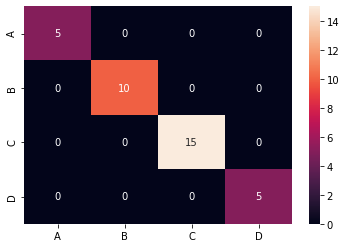

In [18]:
# confusion matrix 시각화
plt.figure()

sns.heatmap(aryDF, annot=True)

plt.show()
plt.close()

In [19]:
# confusion matrix 만들기
ary = [[9,1,0,0],
       [1,15,3,1],
       [5,0,24,1],
       [0,4,1,15]]

aryDF = pd.DataFrame(ary, 
                     index = [i for i in 'ABCD'], 
                     columns = [i for i in 'ABCD'])
aryDF

,A,B,C,D
A,9,1,0,0
B,1,15,3,1
C,5,0,24,1
D,0,4,1,15


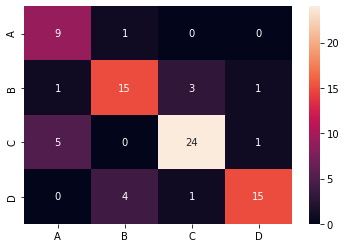

In [20]:
# confusion matrix 시각화
plt.figure()

sns.heatmap(aryDF, annot=True)

plt.show()
plt.close()

In [28]:
# ary 정규화
total = np.sum(ary, axis=1)
print(total)
ary = ary / total[:None]
print(ary)

[1.00079411 0.99179093 1.04542724 1.00078622]
[[0.94828096 0.05218853 0.         0.        ]
 [0.10536455 0.78282791 0.05578649 0.05157982]
 [0.52682276 0.         0.44629195 0.05157982]
 [0.         0.20875411 0.0185955  0.77369725]]


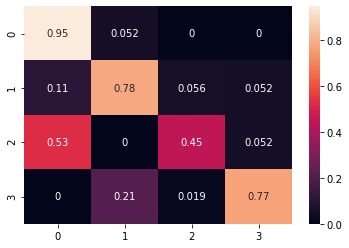

In [29]:
# ary 정규화 시각화
plt.figure()

sns.heatmap(ary, annot=True)

plt.show()
plt.close()

### Titanic

In [106]:
import numpy as np
import pandas as pd

titanic = pd.read_csv('../data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 정확도의 문제점
- 이진분류 : 데이터의 구성에 따라 모델의 성능을 왜곡할 수 있다

In [135]:
from sklearn.base import BaseEstimator 

class UserClassifier(BaseEstimator) :
    def fit(self, X, y=None) :
        pass
    # 성별이 1이면 0, 아니면 1으로 예측
    def predict(self, X) :
        pred = np.zeros((X.shape[0], 1))
        #pred
        for idx in range(X.shape[0]) :
            #print(X_test['Sex'].iloc[idx])
            if X_test['Sex'].iloc[idx] == 1 :
                pred[idx] = 0
            else :
                pred[idx] = 1
        return pred

In [109]:
titanic_label = titanic['Survived']
titanic_data  = titanic.drop(['Survived'], axis = 1)

In [110]:
titanic_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [111]:
titanic_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- 불필요한 피쳐 제거 ['PassengerId', 'Name', 'Ticket']

In [67]:
titanic_df = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


- preprocessing
- age : mean
- cabin : N
- embarked : N

In [68]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy = 'mean')
titanic['Age'] = age_imputer.fit_transform(titanic_df[['Age']])

In [69]:
titanic.Age.isna().sum()

0

In [74]:
titanic_df['Cabin'] = titanic_df['Cabin'].replace(np.nan, 'N')
titanic_df['Embarked'] = titanic_df['Embarked'].replace(np.nan, 'N')
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C148,C


- 레이블 인코딩 cabin, sex, embarked

In [42]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [112]:
# 레일블 인코딩 Cabin , Sex , Embarked
from sklearn.preprocessing import LabelEncoder

def drop_features(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm

def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace=True)
    frm['Cabin'].fillna('N', inplace=True)
    frm['Embarked'].fillna('N', inplace=True)
    return frm


def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(frm[feature])
        frm[feature] = encoder.transform(frm[feature])
    return frm

def transform_features(frm):
    frm = drop_features(frm)
    frm = pre_processing(frm)
    frm = label_encoder(frm)
    return frm


In [113]:
titanic_data_feature = transform_features(titanic_data)
titanic_data_feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_data_feature, 
                                                    titanic_label,
                                                    test_size = 0.2,
                                                    random_state = 10)

In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [138]:
user_model = UserClassifier()
user_model.fit(X_train, y_train)

y_pred = user_model.predict(X_test)
print('accuracy {}'.format(accuracy_score(y_test, y_pred)))

accuracy 0.8212290502793296


In [144]:
pred = np.zeros((X_test.shape[0], 1))

for idx in range(X_test.shape[0]) :
    #print(X_test['Sex'].iloc[idx])
    if X_test['Sex'].iloc[idx] == 1 :
        pred[idx] = 0
    else :
        pred[idx] = 1
    return pred

SyntaxError: 'return' outside function (<ipython-input-144-a50885da7518>, line 9)

In [141]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [150]:
# 평가지표 확인하는 함수
def metrics_evaluation(y_test, y_pred) :
    print('정확도 {}, 정밀도 {}, 재현율 {}, 조화평균 {}'
          .format(accuracy_score(y_test, y_pred),
                  precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred),
                  f1_score(y_test, y_pred),))

In [151]:
from sklearn.linear_model import LogisticRegression

logist_model = LogisticRegression()
logist_model.fit(X_train, y_train)
y_pred = logist_model.predict(X_test)

metrics_evaluation(y_test, y_pred)

정확도 0.8268156424581006, 정밀도 0.746031746031746, 재현율 0.7580645161290323, 조화평균 0.752


In [161]:
# 교차검증
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer

fold = KFold(n_splits=20,
             random_state=1,
             shuffle=True)

scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1_score' : make_scorer(f1_score)
}
result = cross_validate(logist_model, X_train, y_train, cv=fold, scoring=scoring)

In [162]:
result.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score'])

In [163]:
print(result['test_accuracy'].mean())
print(result['test_precision'].mean())
print(result['test_recall'].mean())
print(result['test_f1_score'].mean())

0.7894841269841271
0.7529053220171641
0.6917543567543568
0.7136219150532158
